# Understand the Data



In [1]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\2024 Olympics Medals and Economic status\olympics-economics.csv '
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(7)

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
32,Bahrain,BHR,2,1,1,4,29084.31,2023,1.5
27,Czech Republic,CZE,3,0,2,5,30427.42,2023,10.9
53,Tunisia,TUN,1,1,1,3,3895.39,2023,12.5
54,Botswana,BWA,1,1,0,2,7249.80,2023,2.7
22,Romania,ROU,3,4,2,9,18419.42,2023,19.1
28,Denmark,DNK,2,2,5,9,67967.38,2023,5.9
50,Greece,GRC,1,1,6,8,22990.01,2023,10.4


In [3]:
df.size

810

In [4]:
df.shape

(90, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   gold          90 non-null     int64  
 3   silver        90 non-null     int64  
 4   bronze        90 non-null     int64  
 5   total         90 non-null     int64  
 6   gdp           90 non-null     float64
 7   gdp_year      90 non-null     int64  
 8   population    90 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 6.5+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,90,90,United States,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_code,90,90,USA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gold,90.0,NaN,NaN,NaN,3.644444,7.018933,0.0,0.0,1.0,3.0,40.0
silver,90.0,NaN,NaN,NaN,3.633333,6.797967,0.0,0.0,1.0,3.0,44.0
bronze,90.0,NaN,NaN,NaN,4.255556,6.586607,0.0,1.0,2.0,5.0,42.0
total,90.0,NaN,NaN,NaN,11.533333,19.782071,1.0,2.0,5.0,9.0,126.0
gdp,90.0,NaN,NaN,NaN,24478.053556,25547.857382,1014.21,5815.18,13061.185,34484.6775,103684.88
gdp_year,90.0,NaN,NaN,NaN,2022.977778,0.148231,2022.0,2023.0,2023.0,2023.0,2023.0
population,90.0,NaN,NaN,NaN,69.027778,213.286437,0.1,5.325,12.15,48.55,1428.6


In [7]:
df.columns

Index(['country', 'country_code', 'gold', 'silver', 'bronze', 'total', 'gdp',
       'gdp_year', 'population'],
      dtype='object')

# Data Cleaning 

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

country         0
country_code    0
gold            0
silver          0
bronze          0
total           0
gdp             0
gdp_year        0
population      0
dtype: int64

<Axes: >

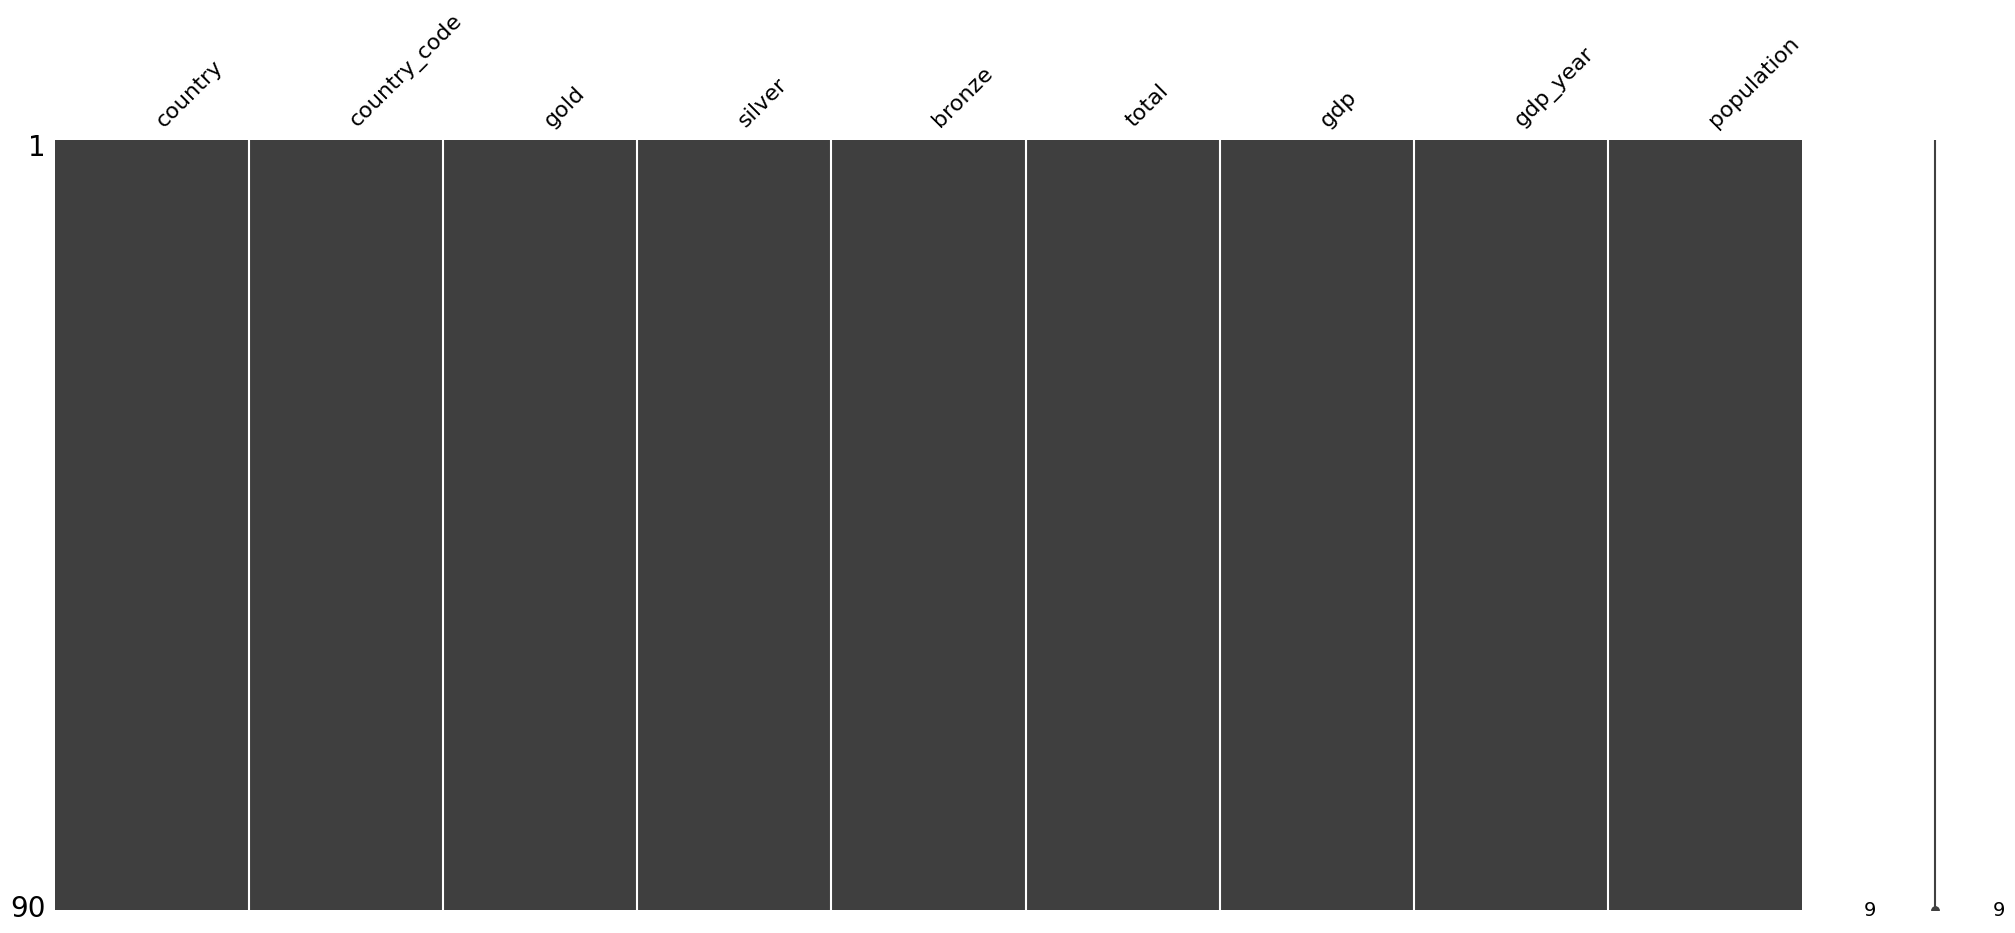

In [10]:
msno.matrix(df)

# Analysis

## Create New Columns

In [11]:
def highest_medal_category(g, s, b):
    medal_counts = {'Gold': g, 'Silver': s, 'Bronze': b}
    highest_category = max(medal_counts, key=medal_counts.get)
    return highest_category


df['highest_medal'] = df.apply(lambda row: highest_medal_category(row['gold'], row['silver'], row['bronze']), axis=1)
df['highest_medal'].sample(5)

71    Bronze
39      Gold
42    Silver
80    Bronze
1       Gold
Name: highest_medal, dtype: object

In [12]:
import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

## Country and Total Medals

In [13]:
fig = px.bar(
    x=df['country'],
    y=df['total'],
    
)

fig.update_layout(
    title='Country and Total Medals',
    xaxis_title='Country',
    yaxis_title='Total Medals',
    width=1200,
    height=500,

)

fig.show()


## Country and GDP and Medals

In [14]:
fig= px.scatter(
    df,
    x='gdp',
    y='total',
    color='country',
    size='total',
    size_max=60,
    hover_data=['gold', 'silver', 'bronze'],
    hover_name='country',
    #facet_row='gdp_year',
    width=1200,
    height=600,
    title='Country and GDP and Medals'
    
)

fig.show()

## Medal Pyramid

In [15]:
fig = px.scatter_ternary(
    df,
    a=df['gold'],
    b=df['bronze'],
    c=df['silver'],
    color='country',
    size='total',
    size_max=50,
    hover_name='country',
)

fig.update_layout(
    title='Medal Pyramid',
    width=800,
    height=800,
)
fig.show()

## Tree map acc to hightest medal Category

In [16]:
fig = px.treemap(
    df,
    path=['highest_medal', 'country_code'],
    values='total',
    hover_name='country',
    branchvalues='total',
    #color='country',
    
)

fig.update_layout(
    title='Highest_medal_category',
    width=1200,
    height=500,
)
fig.show()

In [17]:
df[df['silver'] == 44] # verify the tree map

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population,highest_medal
0,United States,USA,40,44,42,126,81695.19,2023,334.9,Silver


## Medal Funnel

In [18]:
fig = px.funnel(
    df,
    x='total',
    y='highest_medal',
    color='country',
    hover_name='country',
    hover_data=['gold', 'silver', 'bronze']
    
)


# Update layout
fig.update_layout(
    title='Medal Funnel',
    yaxis_title='Medal Stages'
)

fig.show()

## Population & Medal Relationship

In [19]:
fig = px.sunburst(
    df,
    path=['country_code','population','total'],
    values='population',
    color='country',
    hover_name='country',
    title='Population & Medal Relationship',
    width=1200,
    height=800,
)

fig.show()

## Heat map

In [20]:

# Prepare the data for the heatmap
heatmap_data = df[['country', 'gold', 'silver', 'bronze', 'total', 'gdp', 'population']]

# Create the heatmap
fig = px.imshow(
    heatmap_data.set_index('country').T,  # Transpose to get metrics as rows
    labels=dict(x='Country', y='Metrics'),
    x=heatmap_data['country'],
    y=heatmap_data.columns[1:],  # Use all columns except 'country'
    color_continuous_scale='Viridis'  # Choose a color scale
)

# Update layout
fig.update_layout(
    title='Heatmap of Medals and GDP by Country',
    xaxis_title='Country',
    yaxis_title='Metrics',
    height=500,
)

# Show the heatmap
fig.show()

## Correlation Matrix

In [21]:
correlation_matrix = df[['gold', 'silver', 'bronze', 'total', 'gdp', 'population']].corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.index.tolist(),
    colorscale='Viridis',  
    colorbar=dict(title='Correlation'),
))

fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Variables',
    yaxis_title='Variables',
)

fig.show()